## Generalizable Model Test


This notebook is designed to inference a generalized pre-trained model on any user-provided dataset.

---

**Runtime Estimate**  
Using the provided network checkpoints, the typical runtime on a desktop computer is approximately **1 minute**.

**Pre-trained Model**  
Please download the pre-trained, fine-tuned model from [here](https://drive.google.com/file/d/1mhpZ00h3UvXvTfsA_feYd1B2sWD-06uY/view?usp=sharing), and move it to the following directory:  
```
./experiments/pretrained_models
```


In [4]:
from basicsr.demo_test import * 
from basicsr.model_train import restore
import matplotlib.pyplot as plt
import cv2
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
import tifffile
import numpy as np
import os

In [5]:
model_pth = './experiments/pretrained_models/'
tiff_pth = './raw_data.tif'
data_pth = './test_dataset'
generate_raw_data(raw_pth = tiff_pth, save_pth = data_pth, dr = 5)


uint16


In [6]:
output = restore(
    input_pth = os.path.join(data_pth,'test_xz'),
    output_pth = f'../experiments/generalizable_demo_xz',\
    model_pth =  os.path.join(model_pth, 'generalizable_model.pth'))
output = restore(
    input_pth = os.path.join(data_pth,'test_yz'),
    output_pth = f'../experiments/generalizable_demo_yz',\
    model_pth =  os.path.join(model_pth, 'generalizable_model.pth'))

Disable distributed.
none


2024-10-26 12:30:43,394 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/generalizable_model.pth.
2024-10-26 12:30:43,603 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x7017c96de640>


100%|██████████| 500/500 [00:28<00:00, 17.55it/s]

Disable distributed.


none


2024-10-26 12:31:12,987 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/generalizable_model.pth.
2024-10-26 12:31:13,220 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x701688d40040>


100%|██████████| 400/400 [00:29<00:00, 13.58it/s]


In [7]:
# os.path.join(data_pth,'text_xz', f'{idx}.tiff')
in_pth_xz = os.path.join(data_pth,'test_xz')
out_pth_xz = f'../experiments/generalizable_demo_xz'
out_pth_yz = f'../experiments/generalizable_demo_yz'
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:00<00:00, 1290.10it/s]


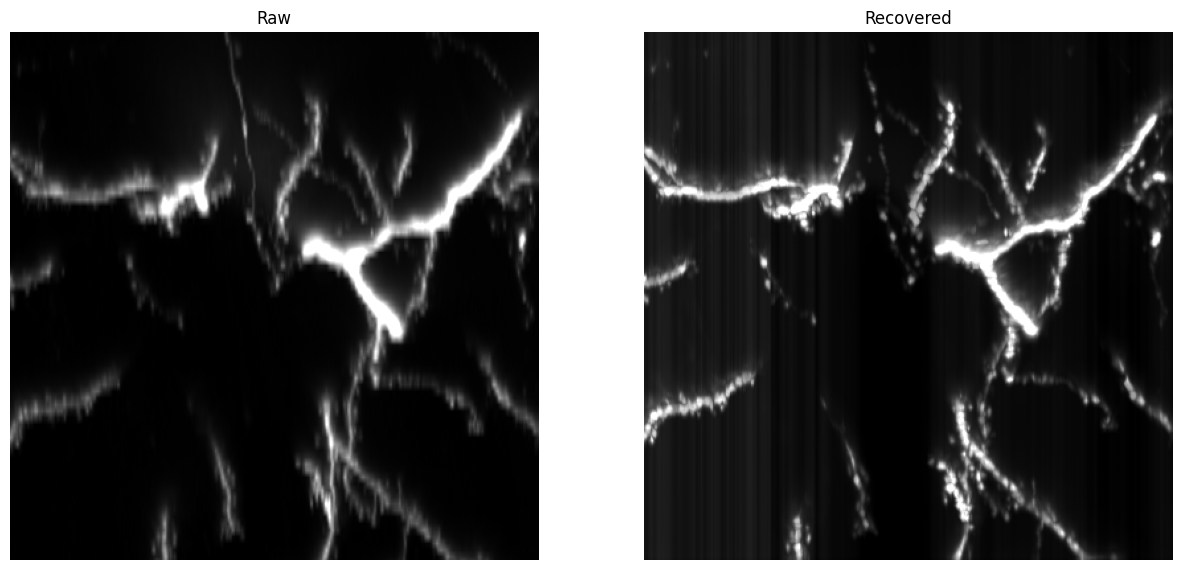

In [8]:

raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 200
depth = 100
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()
